# Research Questions

How valuable was Derek Jeter to the NY Yankees?

How much did Derek Jeter contribute to the wins based on the variables we chose to include?

Looking at other players, was Derek Jeter significantly better at getting a win?

Did Derek Jeter improve throughout his seasons on the Yankees? Did he peak? Which season was his best? What are his most important contributing factors?

# Data Description


Year - the season the data is from.

RSLT - Result: Win or Loss, tracks whether the baseball game played was a win or a loss for the team

H - hits, tracks how many hits Derek Jeter had in a given game. A hit, also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice

HR - home runs, tracks how many home runs Derek Jeter had in a given game. A home run is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process

SB - stolen base, tracks how many bases Derek Jeter had in a given game. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

BB - base on balls (walk) tracks how many walks Derek Jeter had in a given game. A base on balls, also known as a walk, occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out

WPA - win probability added, tracks Derek Jeter’s win probability added in a given game. Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game.

What are the observations (rows) and the attributes (columns)?
-- Each row represents a single game for the 20 seasons he played baseball. The columns each represent a different record of data, or a calculated statistic as explained above.

Why was this dataset created?
-- This data set was created for the purpose of tracking New York Yankees player, Derek Jeter. He was an outstanding player and these statistics were compiled together after each game, each season to allow MLB fans to look back on the result and statistics of the game, and to look at the individual players success.

What processes might have influenced what data was observed and recorded and what was not?
-- Any data that is considered a significant play is recorded. Whenever a player gets a hit, a homerun, times up to bat, etc. The dataset that we are utilizing is a batting log, so only plays that happen while up to bat or on base are recorded.

What preprocessing was done, and how did the data come to be in the form that you are using?
-- The only preprocessed variable in our usage of the dataset is the WPA, win probability added. This is calculated using the data collected throughout the game. We included this in our dataset to compare how much the variables we choose contributed to the actual win probability added.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
-- Yes, collecting sports statistics happens at every major league sporting event and even lower levels. The statistics and data are used for many different purposes. The data that is collected and analyzed is used to help increase fan experience and attendance from year to year. Sports analytics are crucial to many teams by helping them become their best through interpretation and analysis of statistics gained in games.

Who funded the creation of the dataset?
-- 

# Data Collection and Cleaning

To collect our data, we scraped online databases of baseball statistics in order to pull all of Derek Jeter’s in game statistics on a game by game basis for every game of his career ranging from 1995 to 2014. This data contained all of his batting statistics including variables such as OPS, BA, CS, GDP, SH, SF, HBP, SO, IBB, RE24, cWPA, and other such acronyms relating to baseball measurements. However, not all of these variables are applicable or comparable in regards to the type of inferences we are trying to make. Thus, in our data cleaning process, we first evaluated which of the variables would be appropriate and comparable for our studies. We came up with a final list of variables including year, home runs, hits, game result, stolen bases, base on balls, and win probability added. These variables are unique in that they are recorded on a game by game basis and do not accumulate, unlike some of the other variables that were included in the stat sheet. Then, with these specific statistics chosen, we cleaned the data by simply excluding the statistics that we did not want, and then combining the statistics that we did want into a single dataframe which is easily processable and neat. Through this process, we cut our dataset from 38 columns over 19 dataframes to a more readable six columns all in one dataframe. 


# Data Limitations

Baseball statistics are inherently limited in the scope of what they measure. Thus, our dataset can only provide limited conclusions as well. This dataset could include many other statistics if it were to be complete and provide the best, most accurate conclusions, but due to the difficulty of processing so many variables and the time constraints of this project, we chose only the most important ones. There is the possibility that there is human error in recording the information, and it is possible that the older statistics from 1995 are not as precise as the ones gathered more recently, given new technology in sports statistic reporting and recording. 


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [50]:
jeter = pd.read_csv("JeterStats.csv")
jeter.head()

,Year,Rslt,H,HR,SB,BB,WPA
0,2014,"L,2-6",1,0,0,0,0.026
1,2014,"L,1-3",0,0,0,1,-0.051
2,2014,"W,4-2",1,0,0,1,0.089
3,2014,"L,0-4",0,0,0,2,0.180
4,2014,"W,6-4",2,0,0,0,0.007


In [62]:
walks = np.array(jeter.loc[:,"BB"])
hits = np.array(jeter.loc[:,"H"])
correlation_bb_hits = np.corrcoef(walks,hits)
print("Correlation between walks and hits: ", round(correlation_bb_hits[0][1],4))

Correlation between walks and hits:  -0.1196


There is a slight negative correlation between the number of walks Derek Jeter had and the number of hits that he had. This makes sense as the total of the both of these is the number of times he was up to bat. He either got a hit, walk, or a strike. This negative correlation allows us to conclude that Jeter averages more hits than walks.

In [63]:
sb = np.array(jeter.loc[:,"SB"])
hits = np.array(jeter.loc[:,"H"])
correlation_sb_hits = np.corrcoef(sb,hits)
print('Correlation between stolen bases and hits: ', round(correlation_sb_hits[0][1],4))

Correlation between stolen bases and hits:  0.1658


There is a slight positive correlation between the number of stolen bases Derek Jeter had and the number of hits he had. Meaning if he got a hit, there is a positive probability that he steals a base.

In [65]:
real_slope = 0.1658
real_x = np.array(jeter.loc[:,'SB'])
noise = np.random.normal(0,0.5, size=len(jeter.loc[:,"SB"]))
real_y = real_x * real_slope  +  noise
df = pd.DataFrame({"SB": real_x, "H": real_y})
model = LinearRegression().fit(df[["SB"]], df["H"])
print("Estimated Slope: ", model.coef_[0])

Estimated Slope:  0.15166151471324815


The observed slope is slightly less than the real slope because of the added noise and unpredictability of said noise.

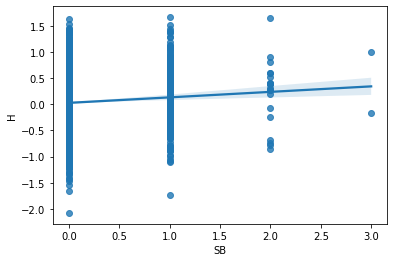

In [54]:
sns.regplot(x='SB', y='H', data=df);

Text(0, 0.5, 'Homeruns')

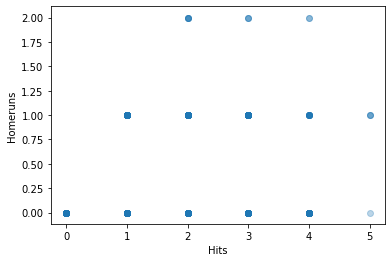

In [55]:
plt.scatter(jeter.H, jeter.HR, alpha=0.3)
plt.xlabel('Hits')
plt.ylabel('Homeruns')

In [56]:
contribute = jeter.WPA.mean()
print('Mean WPA: {:.6f}'.format(contribute))

Mean WPA: 0.011262


Looking at the mean WPA of 0.011262, this shows that overall Derek Jeter made a positive contribution over the 20 seasons he played.

Text(0, 0.5, 'Walks')

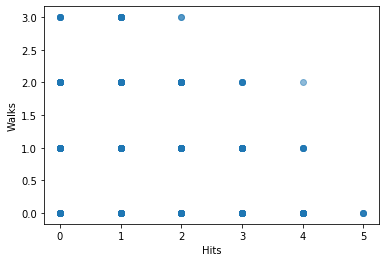

In [57]:
plt.scatter(jeter.H, jeter.BB, alpha=0.5)
plt.xlabel('Hits')
plt.ylabel('Walks')

In [58]:
jeter['win'] = jeter.Rslt.apply(lambda x: 1 if 'W' in x else 0)

In [66]:
jeter_win_subset = jeter[jeter['win']==1]
jeter_loss_subset = jeter[jeter['win']==0]

In [71]:
plt.bar(x=jeter["Year"], y=jeter['H'])
plt.xlabel('Years')
plt.ylabel('Hits')
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'